# M5-L2 Problem 1

256 particles of liquid argon are simulated at 100K. A radial distribution function $g(r)$ describes the density of particles a distance of $r$ from each particle in the system. When an $g(r)$ is computed in a simulation, it is done by creating a histogram of particle distances for a single simulation frame, resulting in a noisy function that is most often averaged over several frames.

Given g(r) vs. r data for a single frame, you will train a decision tree regressor to represent the underlying function.

First, run the cell below to load the data, etc.:

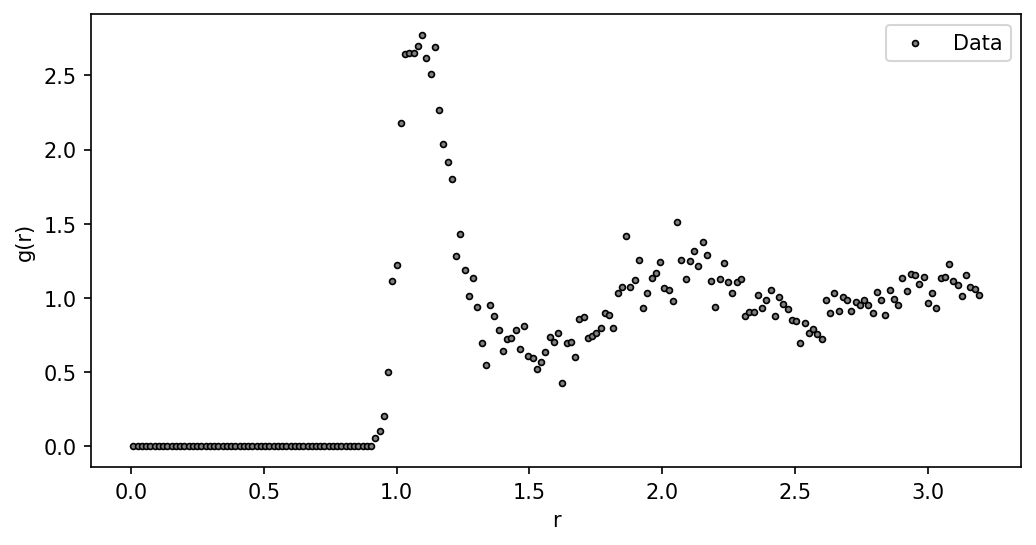

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor,plot_tree

r = np.array([0.008,0.024,0.04,0.056,0.072,0.088,0.104,0.12,0.136,0.152,0.168,0.184,0.2,0.216,0.232,0.248,0.264,0.28,0.296,0.312,0.328,0.344,0.36,0.376,0.392,0.408,0.424,0.44,0.456,0.472,0.488,0.504,0.52,0.536,0.552,0.568,0.584,0.6,0.616,0.632,0.648,0.664,0.68,0.696,0.712,0.728,0.744,0.76,0.776,0.792,0.808,0.824,0.84,0.856,0.872,0.888,0.904,0.92,0.936,0.952,0.968,0.984,1.,1.016,1.032,1.048,1.064,1.08,1.096,1.112,1.128,1.144,1.16,1.176,1.192,1.208,1.224,1.24,1.256,1.272,1.288,1.304,1.32,1.336,1.352,1.368,1.384,1.4,1.416,1.432,1.448,1.464,1.48,1.496,1.512,1.528,1.544,1.56,1.576,1.592,1.608,1.624,1.64,1.656,1.672,1.688,1.704,1.72,1.736,1.752,1.768,1.784,1.8,1.816,1.832,1.848,1.864,1.88,1.896,1.912,1.928,1.944,1.96,1.976,1.992,2.008,2.024,2.04,2.056,2.072,2.088,2.104,2.12,2.136,2.152,2.168,2.184,2.2,2.216,2.232,2.248,2.264,2.28,2.296,2.312,2.328,2.344,2.36,2.376,2.392,2.408,2.424,2.44,2.456,2.472,2.488,2.504,2.52,2.536,2.552,2.568,2.584,2.6,2.616,2.632,2.648,2.664,2.68,2.696,2.712,2.728,2.744,2.76,2.776,2.792,2.808,2.824,2.84,2.856,2.872,2.888,2.904,2.92,2.936,2.952,2.968,2.984,3.,3.016,3.032,3.048,3.064,3.08,3.096,3.112,3.128,3.144,3.16,3.176,3.192])
g = np.array([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.05544386,0.10712918,0.20711708,0.50081745,1.11472598,1.22012447,2.1821515,2.64376719,2.64911457,2.65294708,2.69562454,2.77376447,2.61861756,2.50797663,2.68931818,2.26689052,2.03596337,1.91561847,1.8008928,1.28426572,1.43446024,1.18991213,1.01514516,1.1315213,0.93833591,0.70026145,0.55212987,0.94991189,0.87766939,0.7839945,0.64646203,0.72555547,0.73231761,0.78336931,0.65686305,0.81413418,0.60809401,0.59529251,0.52259196,0.57087309,0.63635724,0.73686597,0.70361302,0.7622785,0.42704706,0.69792524,0.70161662,0.60431962,0.85643668,0.87275318,0.7296891,0.7474442,0.76443196,0.79569831,0.89945052,0.88353146,0.7968812,1.03470863,1.07183518,1.41819147,1.07549093,1.12268846,1.25802079,0.93423304,1.03067839,1.13607878,1.16583082,1.24179054,1.07077486,1.05391261,0.98106265,1.50983868,1.25706065,1.13022846,1.250917,1.31563923,1.21371727,1.37813711,1.28798035,1.11176062,0.94051237,1.12766645,1.2340169,1.10507707,1.03457944,1.11038526,1.13057206,0.8779356,0.90920474,0.90537608,1.0195294,0.93102976,0.98423165,1.05212864,0.87854888,1.00894807,0.95694484,0.92923803,0.84909411,0.84576239,0.69464892,0.83184989,0.76380616,0.78989904,0.75906226,0.72198026,0.9874741,0.90098713,1.03067915,0.91253471,1.00621293,0.9878487,0.91242139,0.9711153,0.95359077,0.98569069,0.95609177,0.89700384,1.04155623,0.98859586,0.88439405,1.05286721,0.99565323,0.95089216,1.13520919,1.04574757,1.15959539,1.1524446,1.09743404,1.13840063,0.96464661,1.03698486,0.93418253,1.13655812,1.13971533,1.2317909,1.11138118,1.08544529,1.01201762,1.15841419,1.07151883,1.06074989,1.01790126])

def plot(r, g, dt = None):
    if dt is not None:
        plt.figure(figsize=(12,3),dpi=150)
        plt.subplot(121)
        rs = np.linspace(0,4,1000)
        gs = dt.predict(rs.reshape(-1,1))
        plt.plot(rs,gs,color="red",label="Regression Tree",alpha=0.7)
    else:
        plt.figure(figsize=(8,4),dpi=150)

    plt.scatter(r,g,s=8,c="gray", label="Data", edgecolors="black",linewidths=.8)
    plt.legend(loc="upper right")
    plt.xlabel("r")
    plt.ylabel("g(r)")

    if dt is not None:
        plt.subplot(122)
        plot_tree(dt)
        plt.title(f"Tree max. depth: {dt.max_depth}",y=-.2)

    plt.show()

plot(r,g)

## Training regression trees

For input `r` and output `g`, train a `DecisionTreeRegressor()` to perform the regression with `max_depth` values of 1, 2, 6, 10.

Complete the code below, which will plot your decision tree results and visualize the tree. Name each decision tree within the loop `dt`.

Note: you may need to resize the input `r` as `r.reshape(-1,1)` before passing it as input into the fitting function.

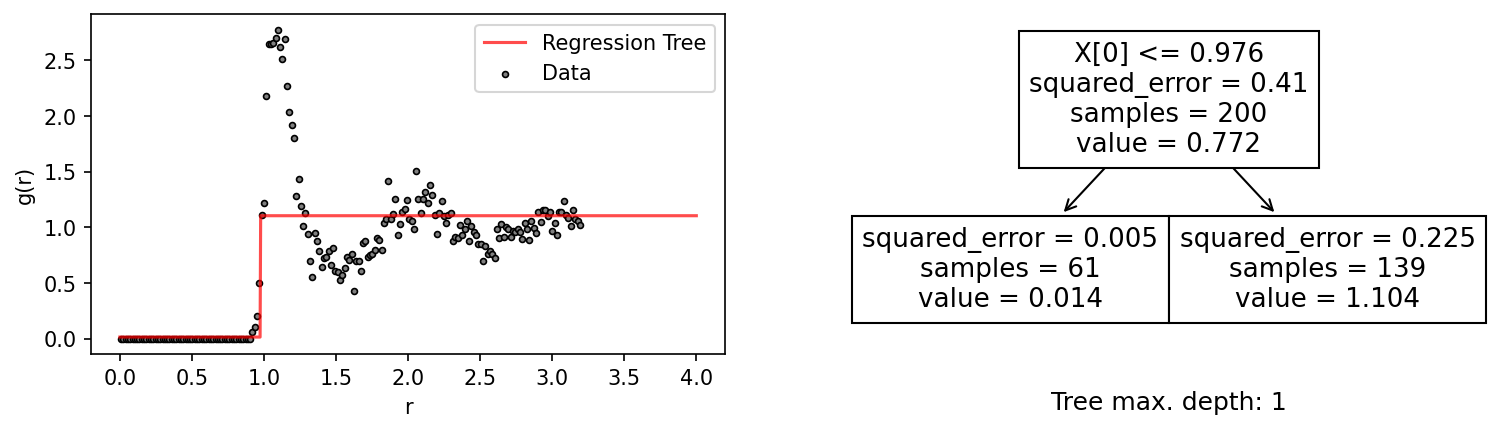

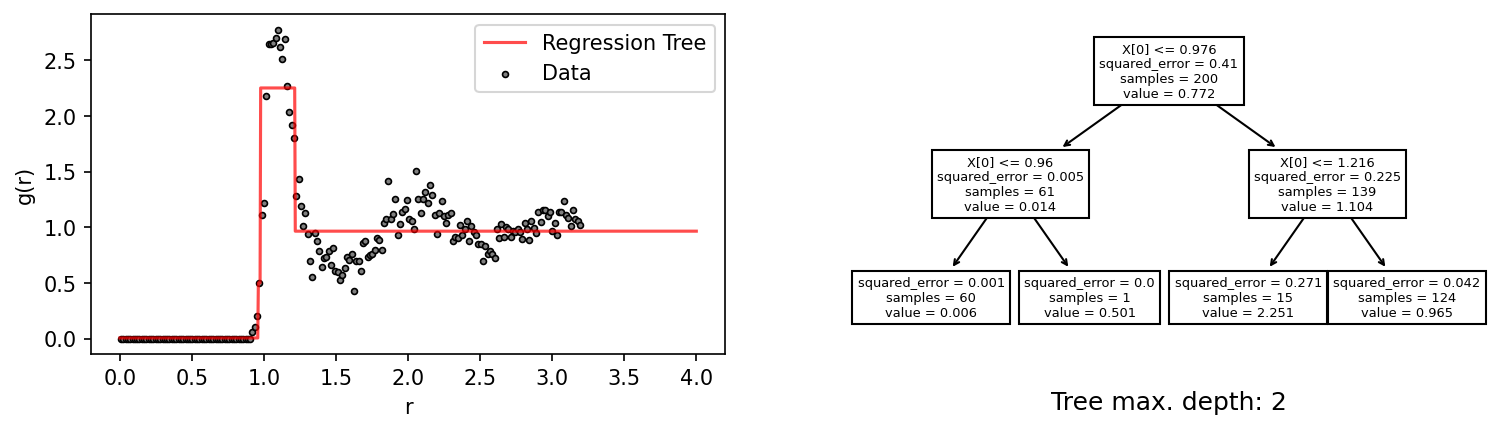

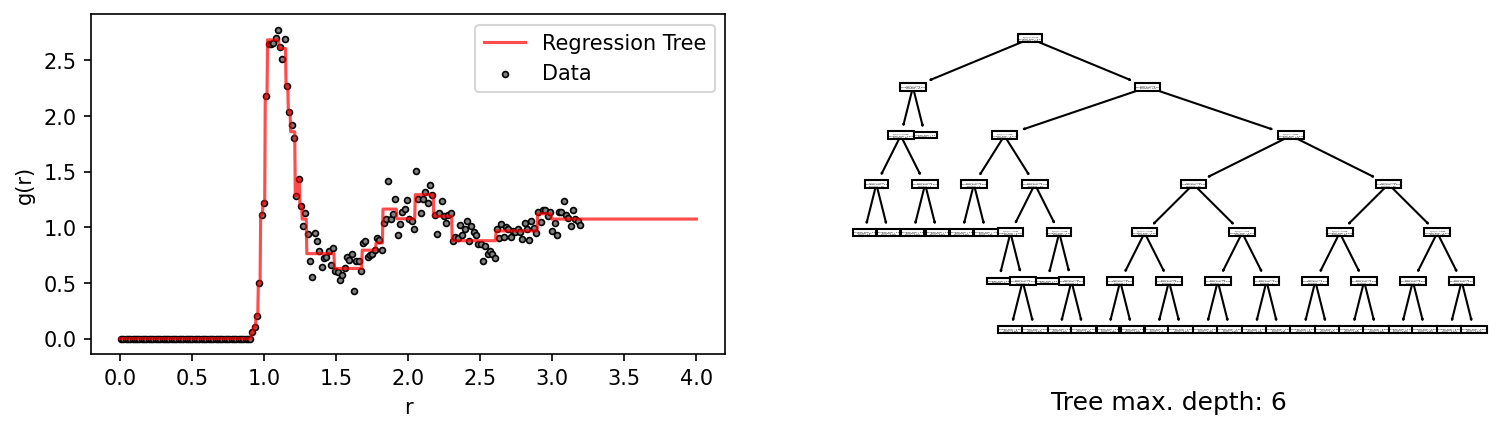

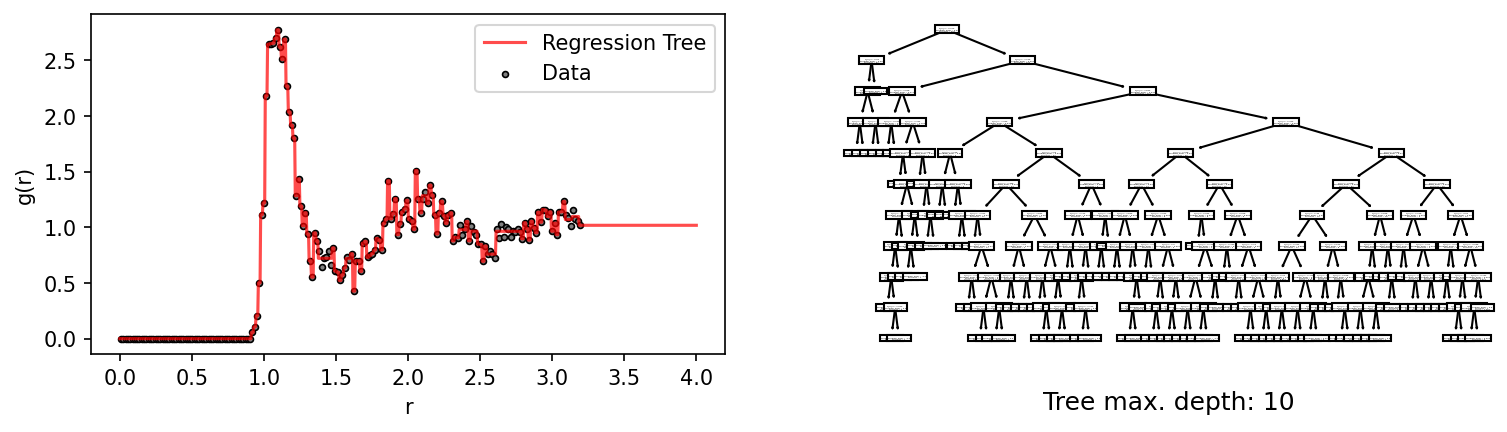

In [4]:
for max_depth in [1, 2, 6, 10]:
    # YOUR CODE GOES HERE
    # Create and fit `dt`
    dt = DecisionTreeRegressor(max_depth=max_depth)
    r = r.reshape(-1,1)
    dt.fit(r,g)
    dt.predict(r)

    plot(r,g,dt)